## **THƯ VIỆN**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import math
from sklearn.model_selection import ( RandomizedSearchCV,GridSearchCV,
                                    StratifiedKFold,
                                    train_test_split)
from imblearn.over_sampling import SMOTE,BorderlineSMOTE

from sklearn.metrics import (f1_score, precision_score, recall_score,  
                            classification_report, make_scorer, 
                            average_precision_score, precision_recall_curve)

from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler

## **1. Phân tích dữ liệu khám phá ban đầu (EDA):**

In [2]:
df = pd.read_csv("winequality-red.csv", delimiter=';') 
# delimiter để ngăn cách giữa các thực thể 
# trong dataframe ( ở dâyd trong file csv đc ngăn cách bằng ";")
# chỉnh lại type thành dạng float để đồng nhất hóa đơn vị
df['quality'] = df['quality'].astype("float")
df = pd.DataFrame(df)
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


## KIỂM TRA RA DỮ LIỆU TỔNG THỂ

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [4]:
# check summary statistics of the data
df.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
# check null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## KIỂM TRA CHI TIẾT CÁC CỘT

In [6]:
def Column_Info(column):
    for column in df.columns:
        print("Chi tiết",column,"column")
     
    # DataType 
        print("\nDataType: ",df[column].dtype)
    
    #Check Nah
        count_null = df[column].isna().sum()
        if count_null == 0:
            print("\nKhông có giá trị bị thiếu")
        elif count_null > 0:
            print("\nCố tất cả ",count_null," giá trị bị thiếu")
        
    # count Unique Values
        print("\nĐếm số giá trị là: ",df[column].nunique())
    
    # Get AttributesAttributes of Column    
        print("\nPhân bổ giá trị trong cột là:\n")
        print(df[column].value_counts())
        print('-'*50)

In [7]:
Column_Info(df.columns)

Chi tiết fixed acidity column

DataType:  float64

Không có giá trị bị thiếu

Đếm số giá trị là:  96

Phân bổ giá trị trong cột là:

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64
--------------------------------------------------
Chi tiết volatile acidity column

DataType:  float64

Không có giá trị bị thiếu

Đếm số giá trị là:  143

Phân bổ giá trị trong cột là:

volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64
--------------------------------------------------
Chi tiết citric acid column

DataType:  float64

Không có giá trị bị thiếu

Đếm số giá trị là:  80

Phân bổ giá trị trong cột là:

citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78

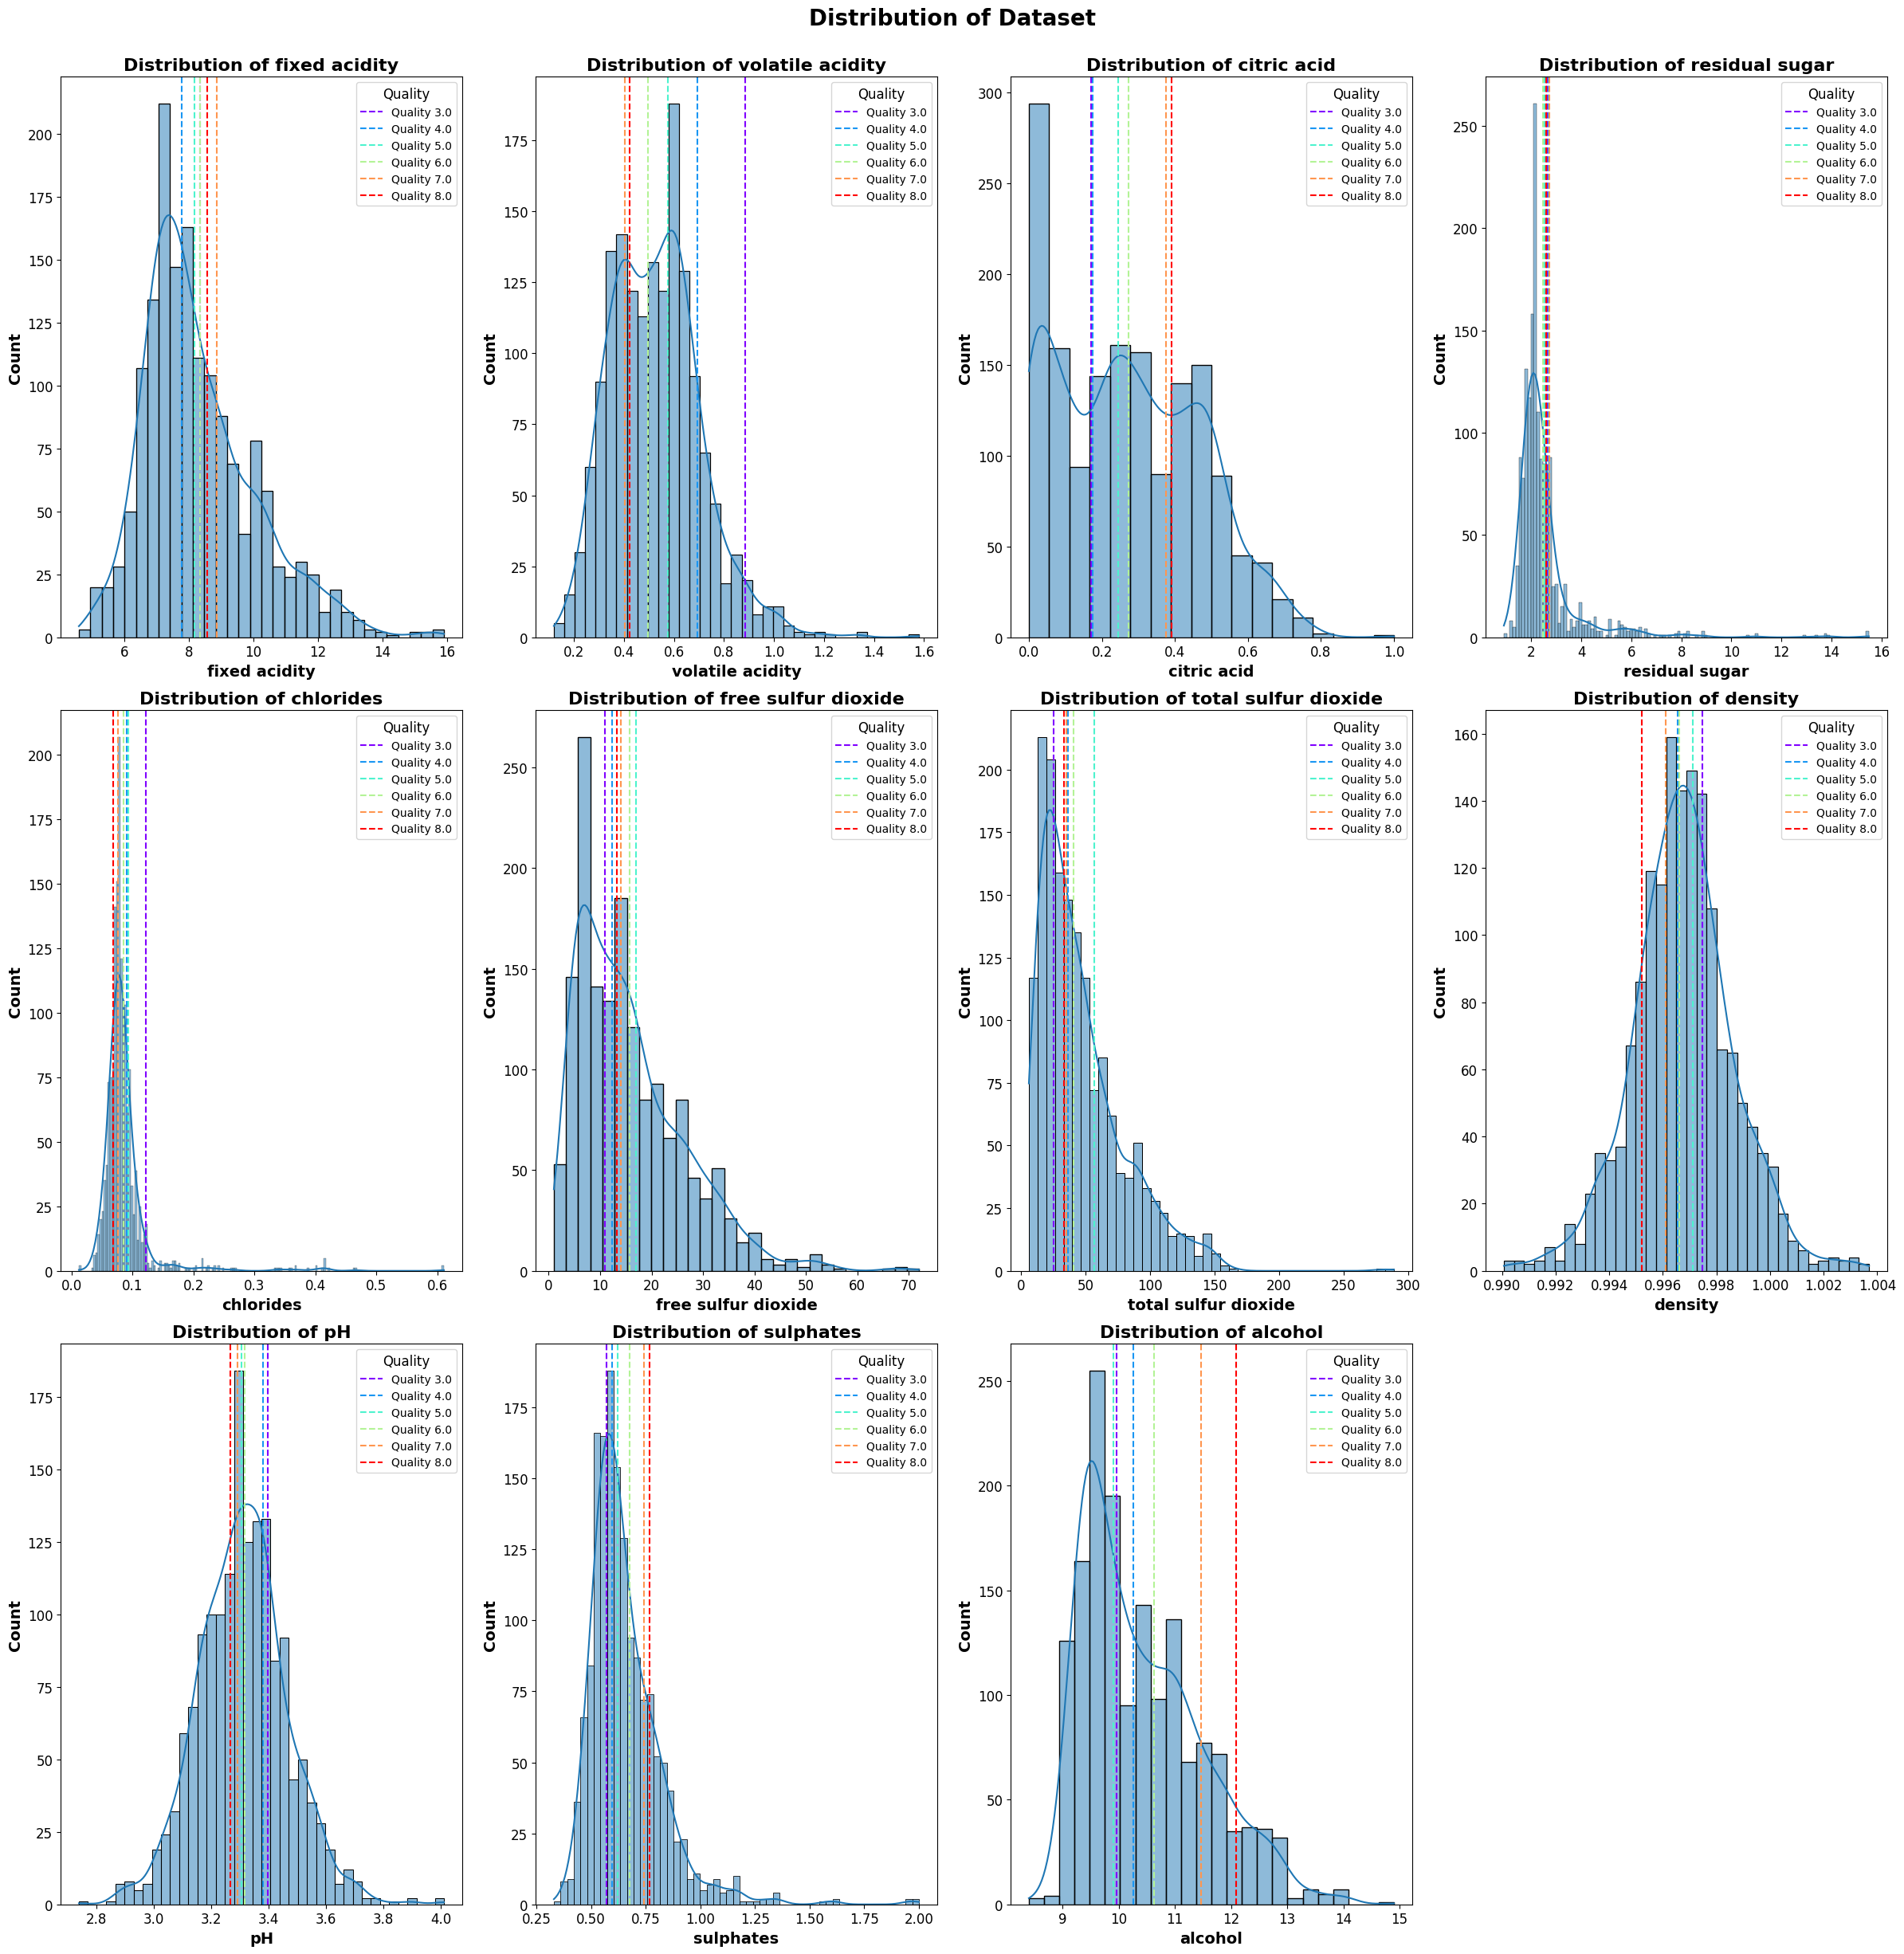

In [8]:
plot_df = df.copy()

n_cols = 4
n_rows = math.ceil((len(plot_df.columns) - 1) / n_cols)  # -1 to exclude 'quality'

fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 8 * n_rows))
fig.tight_layout(pad=5.0)

axes = axes.flatten()

quality_values = sorted(plot_df['quality'].unique())
colors = plt.cm.rainbow(np.linspace(0, 1, len(quality_values)))

for i, col in enumerate(plot_df.columns):
    if col != 'quality':
        sns.histplot(data=plot_df, x=col, ax=axes[i], kde=True)
        
        for q, c in zip(quality_values, colors):
            subset = plot_df[plot_df['quality'] == q]
            if not subset.empty:
                axes[i].axvline(subset[col].mean(), color=c, linestyle='--', 
                                label=f'Quality {q}')
        
        axes[i].set_xlabel(col, fontsize=14, fontweight='bold')
        axes[i].set_ylabel('Count', fontsize=14, fontweight='bold')
        
        axes[i].set_title(f'Distribution of {col}', fontsize=16, fontweight='bold')
        
        axes[i].tick_params(labelsize=12)
        axes[i].legend(fontsize=10, title='Quality', title_fontsize=12)

for j in range(len(plot_df.columns) - 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

fig.suptitle('Distribution of Dataset', fontsize=20, fontweight='bold', y=1.02)

plt.show()

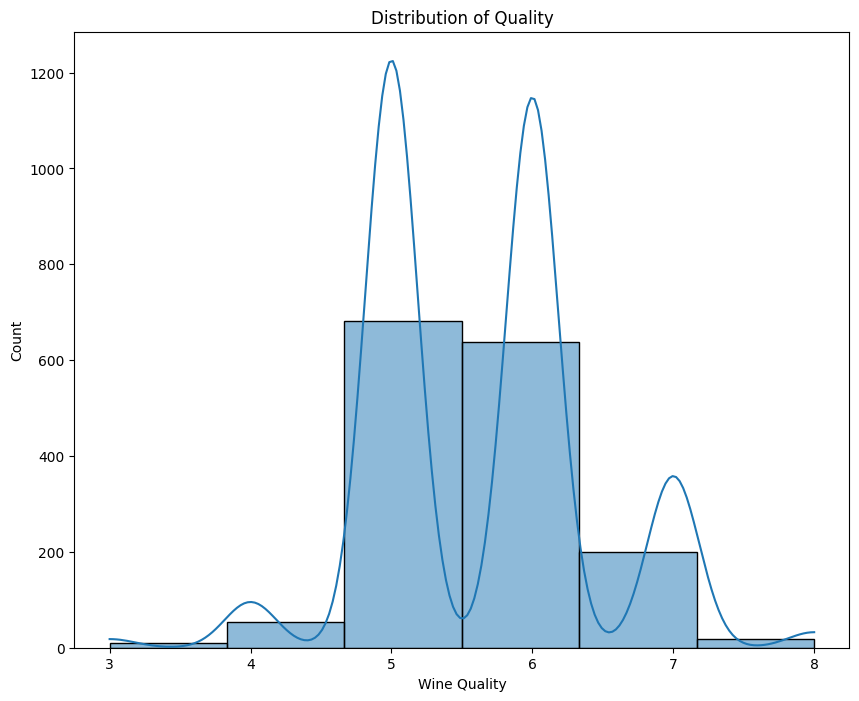

In [9]:
plt.figure(figsize=(10,8))
sns.histplot(df['quality'], kde=True, bins=6)
plt.title('Distribution of Quality')
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

Từ biểu đồ phân phối chất lượng rượu này, ta có thể rút ra một số nhận xét quan trọng:

Phân phối chất lượng rượu có dạng chuông không đối xứng, với đa số mẫu tập trung ở mức trung bình.
Đây là phân phối đa phương thức, với hai đỉnh chính rõ rệt.


Các mức chất lượng chính:

Hai mức chất lượng phổ biến nhất là 5 và 6, chiếm phần lớn các mẫu.
Mức chất lượng 5 có số lượng mẫu cao nhất, tiếp theo là mức 6.

-- Chất lượng trung bình:

Phần lớn rượu trong bộ dữ liệu có chất lượng trung bình, tập trung ở mức 5-6.

-- Chất lượng cao và thấp:

Có rất ít mẫu rượu chất lượng rất cao (mức 7-8) hoặc rất thấp (mức 3-4).
Số lượng mẫu giảm đáng kể ở hai đầu của thang đánh giá.

-- Khoảng chất lượng:

Thang đánh giá chất lượng từ 3 đến 8, không có mẫu nào ở mức 1-2 hoặc 9-10.

-- Tính không cân đối:

Phân phối hơi lệch phải, với đuôi dài hơn về phía chất lượng cao.

Kết luận:

Bộ dữ liệu này chủ yếu bao gồm rượu có chất lượng trung bình.

Rượu chất lượng xuất sắc hoặc kém chất lượng đều hiếm gặp trong bộ dữ liệu.

Việc phân loại rượu thành các nhóm chất lượng (thấp, trung bình, cao) có thể hữu ích cho phân tích và mô hình hóa.

==>Sự mất cân đối trong phân phối có thể ảnh hưởng đến việc xây dựng mô hình dự đoán

Từ biểu đồ phân bố giá trị  của các thuộc tính ta có thể thấy :
==> Các thuộc tính 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide' và 'density' có phân bố dữ liệu không đều, có nhiều giá trị nằm ở phía bên trái của biểu đồ, điều này có thể làm cho mô hình dễ bị nhiễu bởi các giá trị ngoại lai.

Fixed acidity:

Phân phối lệch phải, với đỉnh chính ở khoảng 6-8.
Rượu chất lượng cao (màu đỏ) có xu hướng có độ axit cố định cao hơn.

Volatile acidity:

Phân phối khá cân đối, với đỉnh ở khoảng 0.3-0.4.
Rượu chất lượng thấp có xu hướng có độ axit bay hơi cao hơn.

Citric acid:

Phân phối đa phương thức với nhiều đỉnh.
Rượu chất lượng cao có xu hướng có hàm lượng axit citric cao hơn.

Residual sugar:

Phân phối lệch phải mạnh, với đa số mẫu có lượng đường dư thấp (dưới 5).
Không có sự khác biệt rõ ràng giữa các mức chất lượng.

Chlorides:

Phân phối lệch phải, tập trung chủ yếu ở khoảng 0.05-0.1.
Rượu chất lượng cao có xu hướng có hàm lượng clorua thấp hơn.

Free sulfur dioxide và Total sulfur dioxide:

Cả hai đều có phân phối lệch phải.

Rượu chất lượng cao có xu hướng có hàm lượng sulfur dioxide tự do và tổng số thấp hơn.

Density:

Phân phối gần như chuẩn, tập trung quanh 0.995-1.000.
Không có sự khác biệt rõ ràng giữa các mức chất lượng.

pH:

Phân phối gần như chuẩn, tập trung quanh 3.0-3.4.
Không có sự khác biệt rõ ràng giữa các mức chất lượng.


Sulphates:

Phân phối lệch phải, với đỉnh ở khoảng 0.5.
Rượu chất lượng cao có xu hướng có hàm lượng sulphate cao hơn.

Alcohol:

Phân phối lệch phải nhẹ.
Rượu chất lượng cao có xu hướng có nồng độ cồn cao hơn.

Quality:

Phân phối gần như chuẩn, với đa số mẫu tập trung ở mức chất lượng trung bình (5-6).
Ít mẫu ở mức chất lượng rất thấp hoặc rất cao.

kết luận

-- Nhiều đặc trưng có mối tương quan với chất lượng rượu, đặc biệt là volatile acidity, citric acid, chlorides, sulfur dioxide, sulphates và alcohol.

-- Phần lớn các đặc trưng có phân phối lệch, cho thấy sự không đồng đều trong dữ liệu.

Bộ dữ liệu có vẻ khá đồng nhất với 1599 mẫu cho mỗi đặc trưng, không có giá trị null.

## **2. Tiền xử lý dữ liệu**

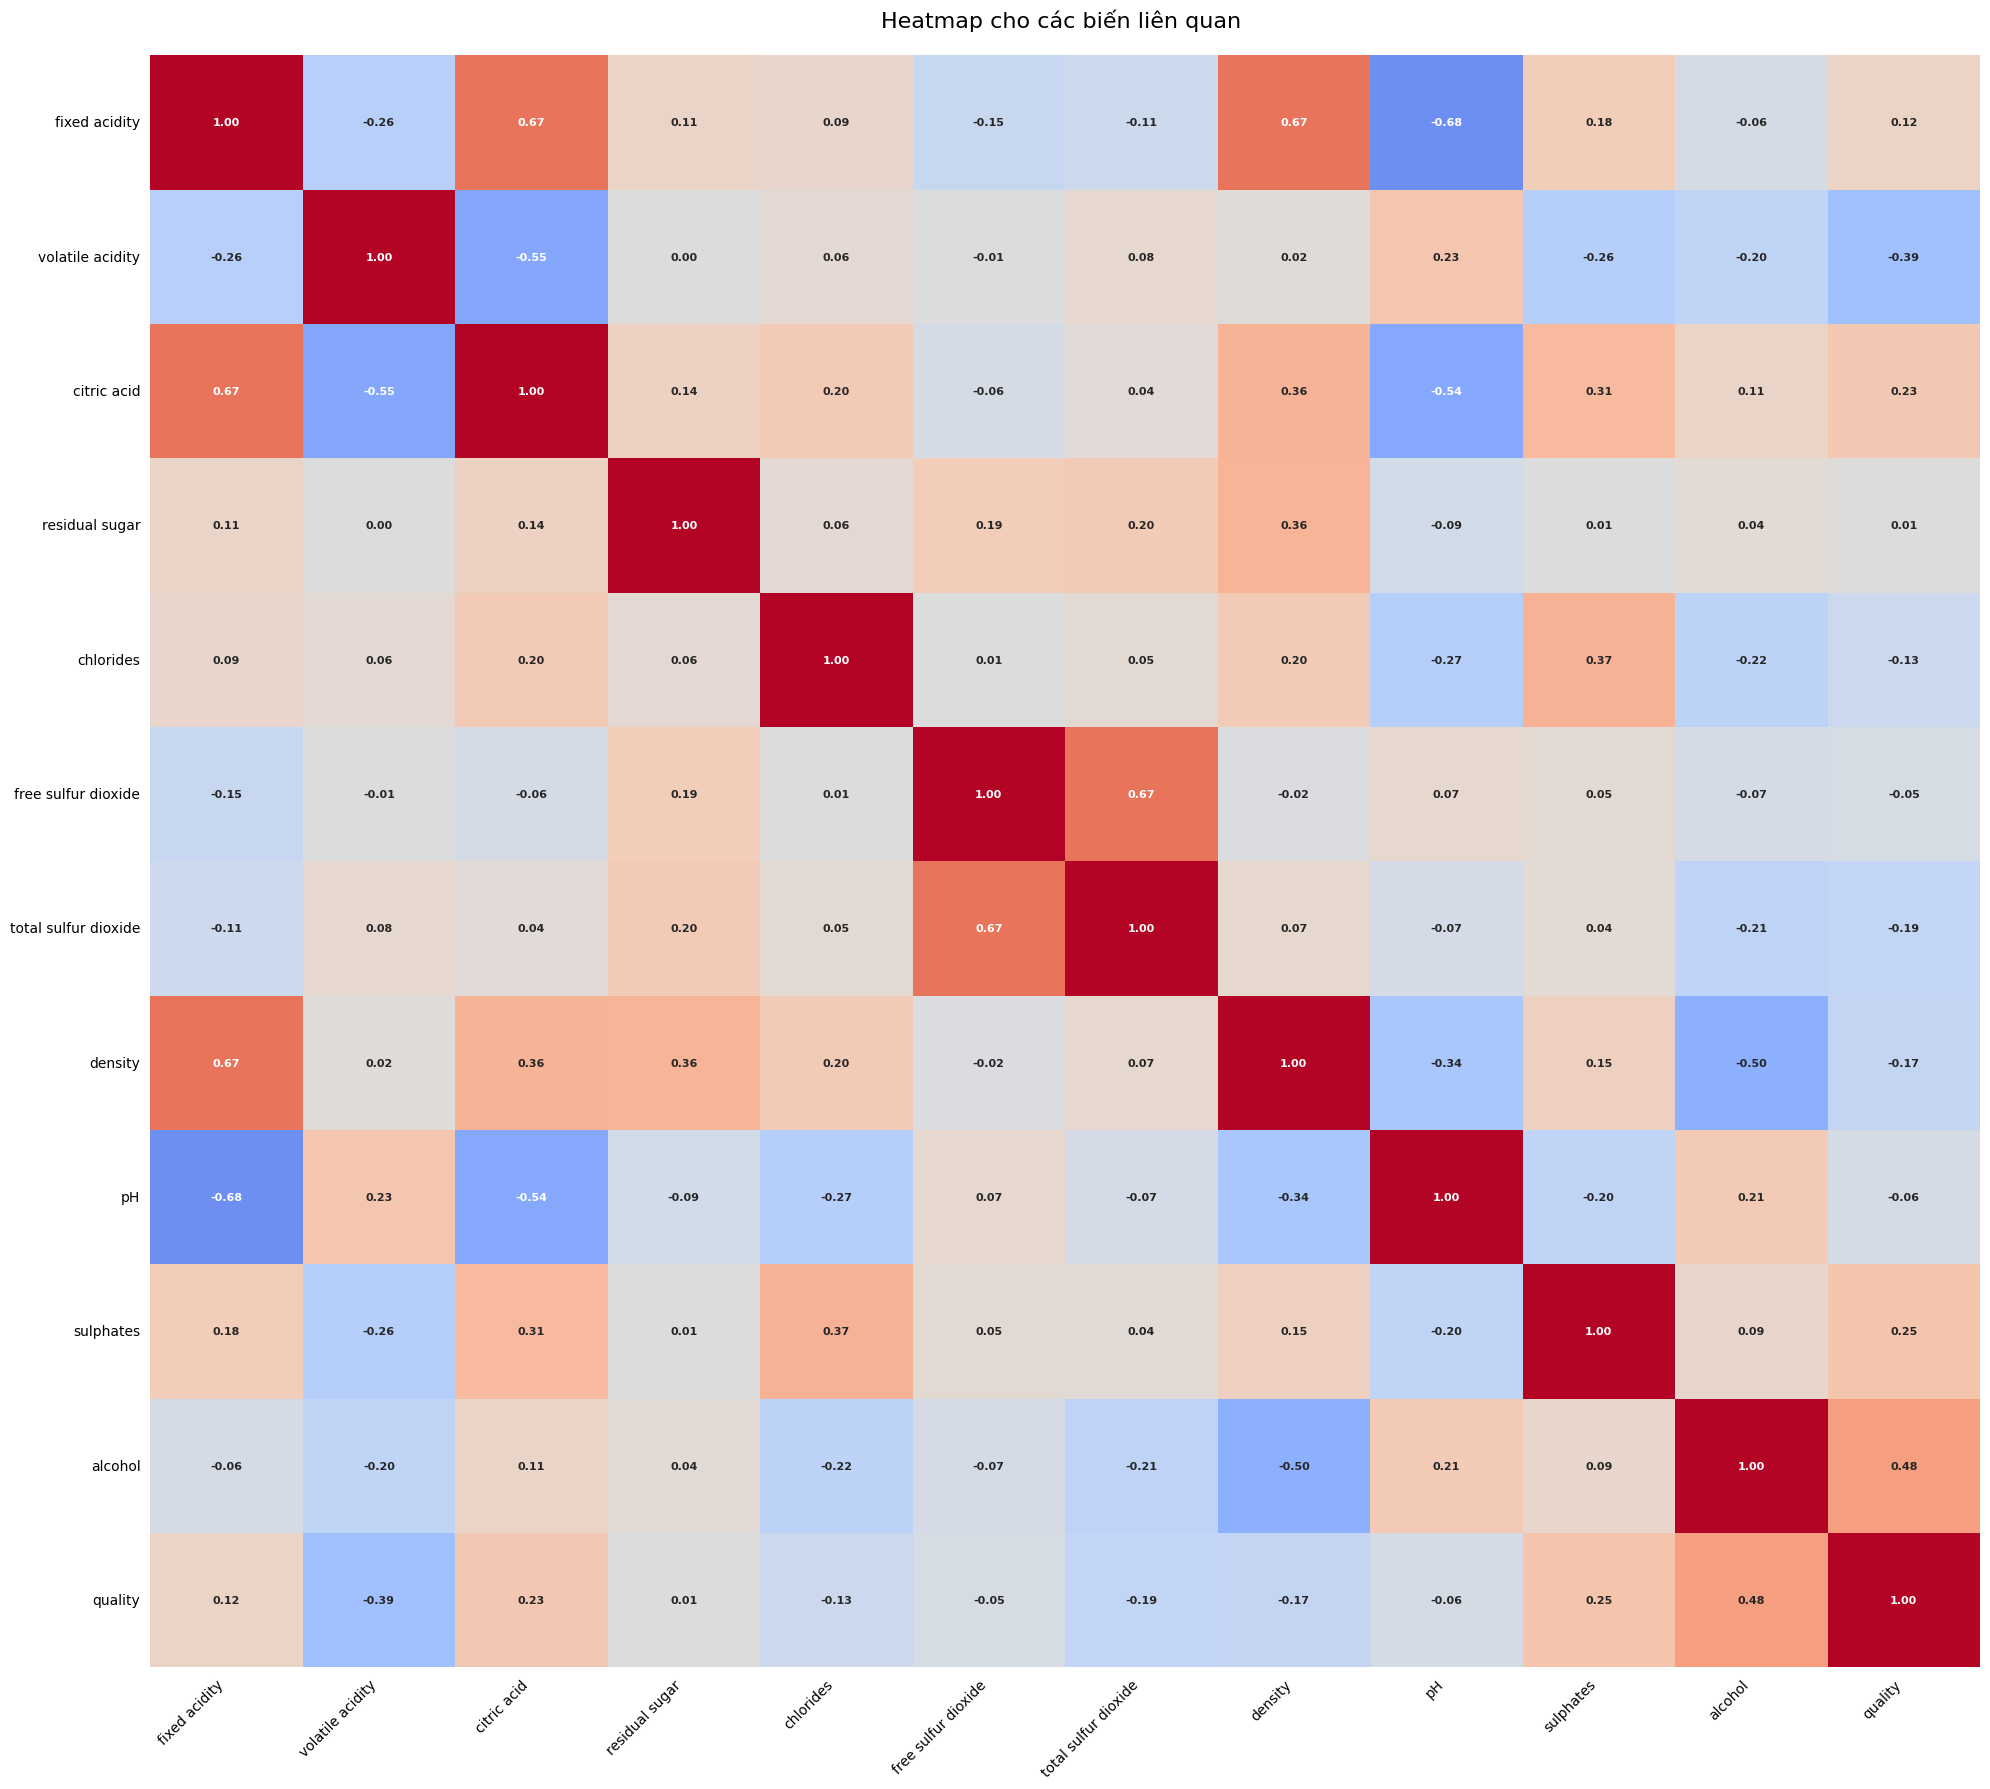

In [10]:
corr = plot_df.corr()

fig, ax = plt.subplots(figsize=(20, 18))  
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f',
            cmap='coolwarm', annot_kws={'fontsize': 8, 'fontweight': 'bold'}, cbar=False)

ax.tick_params(left=False, bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

plt.title('Heatmap cho các biến liên quan ', fontsize=16, pad=20)
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()

In [11]:
# extract the correlation of the target variable (quality)
corr_quality = corr['quality']
corr_quality = corr_quality.abs().sort_values(ascending=False)
# print the correlations of the target variable (quality) with other features
print('Correlation of Wine Quality":')
print(corr_quality)

Correlation of Wine Quality":
quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64


-- Nhiều đặc trưng có mối tương quan với chất lượng rượu, đặc biệt là volatile acidity, citric acid, chlorides, sulfur dioxide, sulphates và alcohol.

-- => Các biến liên quan có tương quan khá vừa (correlation < 0.8) vậy ta nên chọn hết để build model

CHECK OUTLIERS USING IQR METHOD

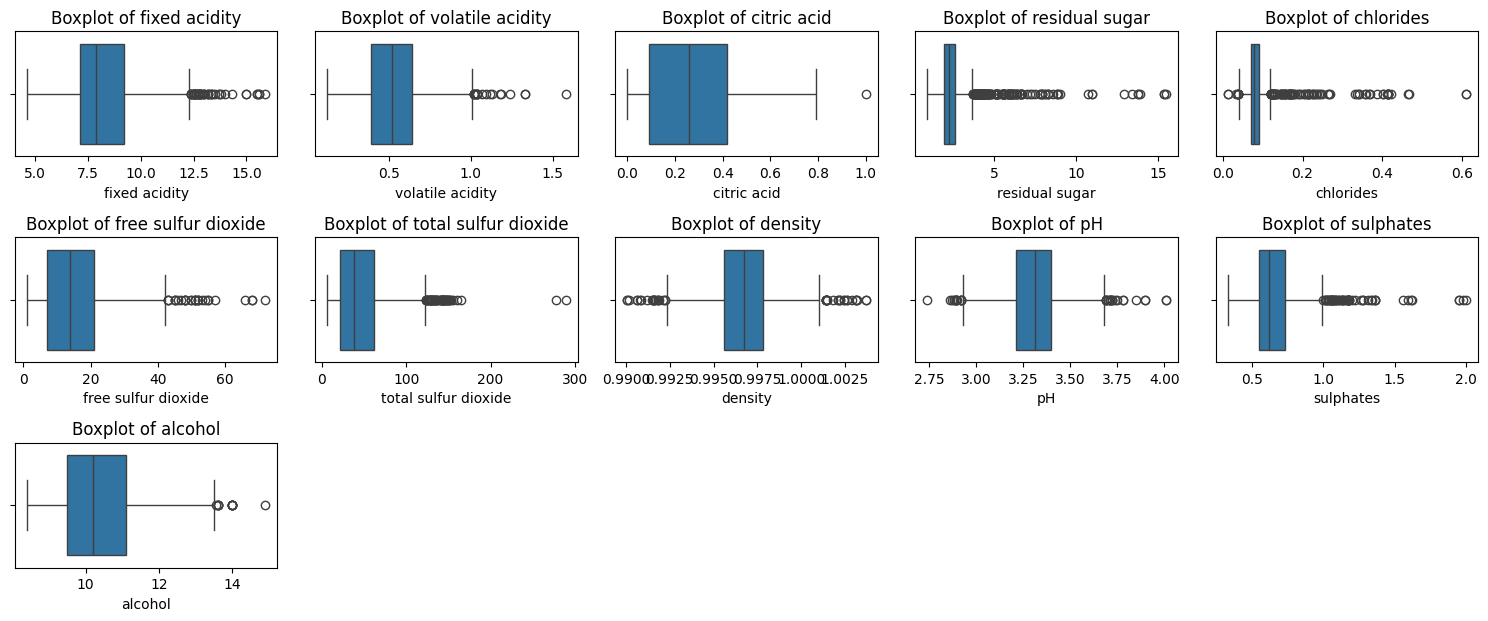

In [12]:
# plot boxplots for each numeric feature to visually identity coutliers
outliers_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# plotting through seaborn
plt.figure(figsize=(15, 10))
for i, feature in enumerate(outliers_col, 1):
    plt.subplot(5, 5, i)  # Adjust subplot grid size based on the number of features
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [13]:
# Tính IQR cho từng cột
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Xác định khoảng cho phép
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Lọc các cột có outliers
df_outliers = df[((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Hiển thị các cột có outliers
print("Các cột có outliers:", df_outliers.columns.tolist())

Các cột có outliers: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


=> Ta sẽ giữ outliers do dataset này khá bé đồng nhất và không có giá trị null nên ta sẽ giữ lại"""

## **3. Phân tích đặc trưng và tạo đặc trưng mới: FEATURE ENGINEERING**


Ta sẽ gộp lại những feature có tương quan với nhau lại để giúp mô hình học tốt hơn

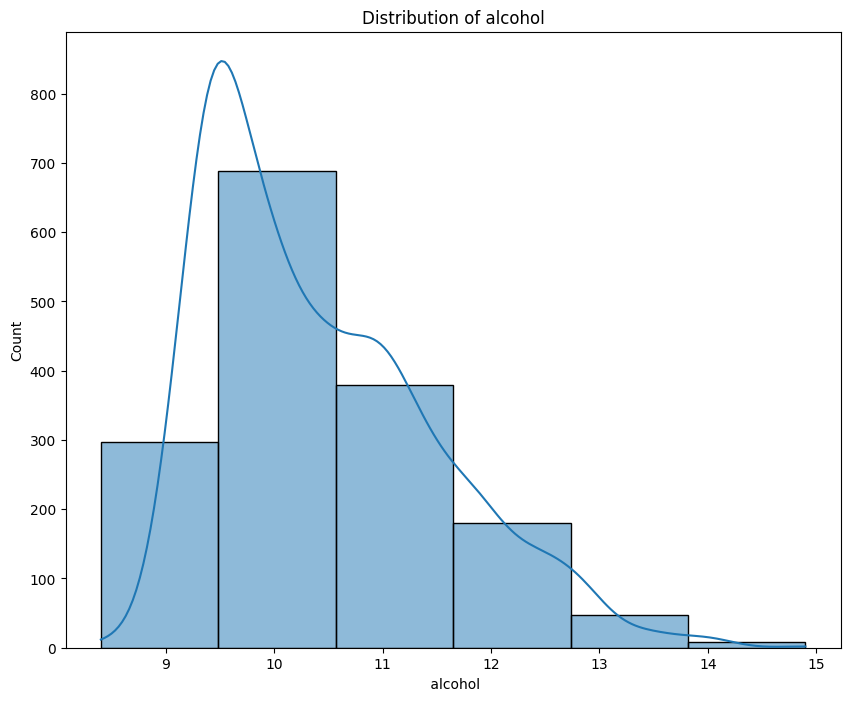

In [14]:
plt.figure(figsize=(10,8))
sns.histplot(plot_df['alcohol'], kde=True, bins=6)
plt.title('Distribution of alcohol')
plt.xlabel(" alcohol")
plt.ylabel("Count")
plt.show()

In [15]:
df['sulfur_ratio'] = df['free sulfur dioxide'] / df['total sulfur dioxide'] 
# Tỷ lệ giữa sulfur dioxide tự do và tổng sulfur dioxide.

df['not_free_sulfur'] = df['total sulfur dioxide'] - df['free sulfur dioxide'] 
# Lượng sulfur dioxide không tự do.

df['fixed_volatile_acidity_interaction'] = df['fixed acidity'] * df['volatile acidity'] 
#Tương tác giữa độ axit cố định và độ axit bay hơi.

df['citric_residual_sugar_interaction'] = df['citric acid'] * df['residual sugar'] 
#Tương tác giữa axit citric và đường dư.( do có cùng tương quan với density)


q = df['alcohol'].quantile([0.2, 0.4, 0.6, 0.8]) 
#Phân loại nồng độ cồn thành các nhóm ( rất thấp, thấp, trung , cao,rất cao) vì có sự phân loại khá rõ.
# gán nhãn
df['alcohol_bins'] = pd.cut(df['alcohol'], bins=[-np.inf, q[0.2], q[0.4], q[0.6], q[0.8], np.inf], labels=[0, 1, 2, 3, 4])

df['quality_bins'] = pd.cut(df['quality'],bins = [-np.inf, 4, 6, np.inf],labels = [0,1,2]) 
# Phân loại chất lượng thành 2 loại ( tệ trung bình  tốt)

## **4. Chọn đặc trưng:**


Kiểm tra loại correlation sau khi thêm biến mới

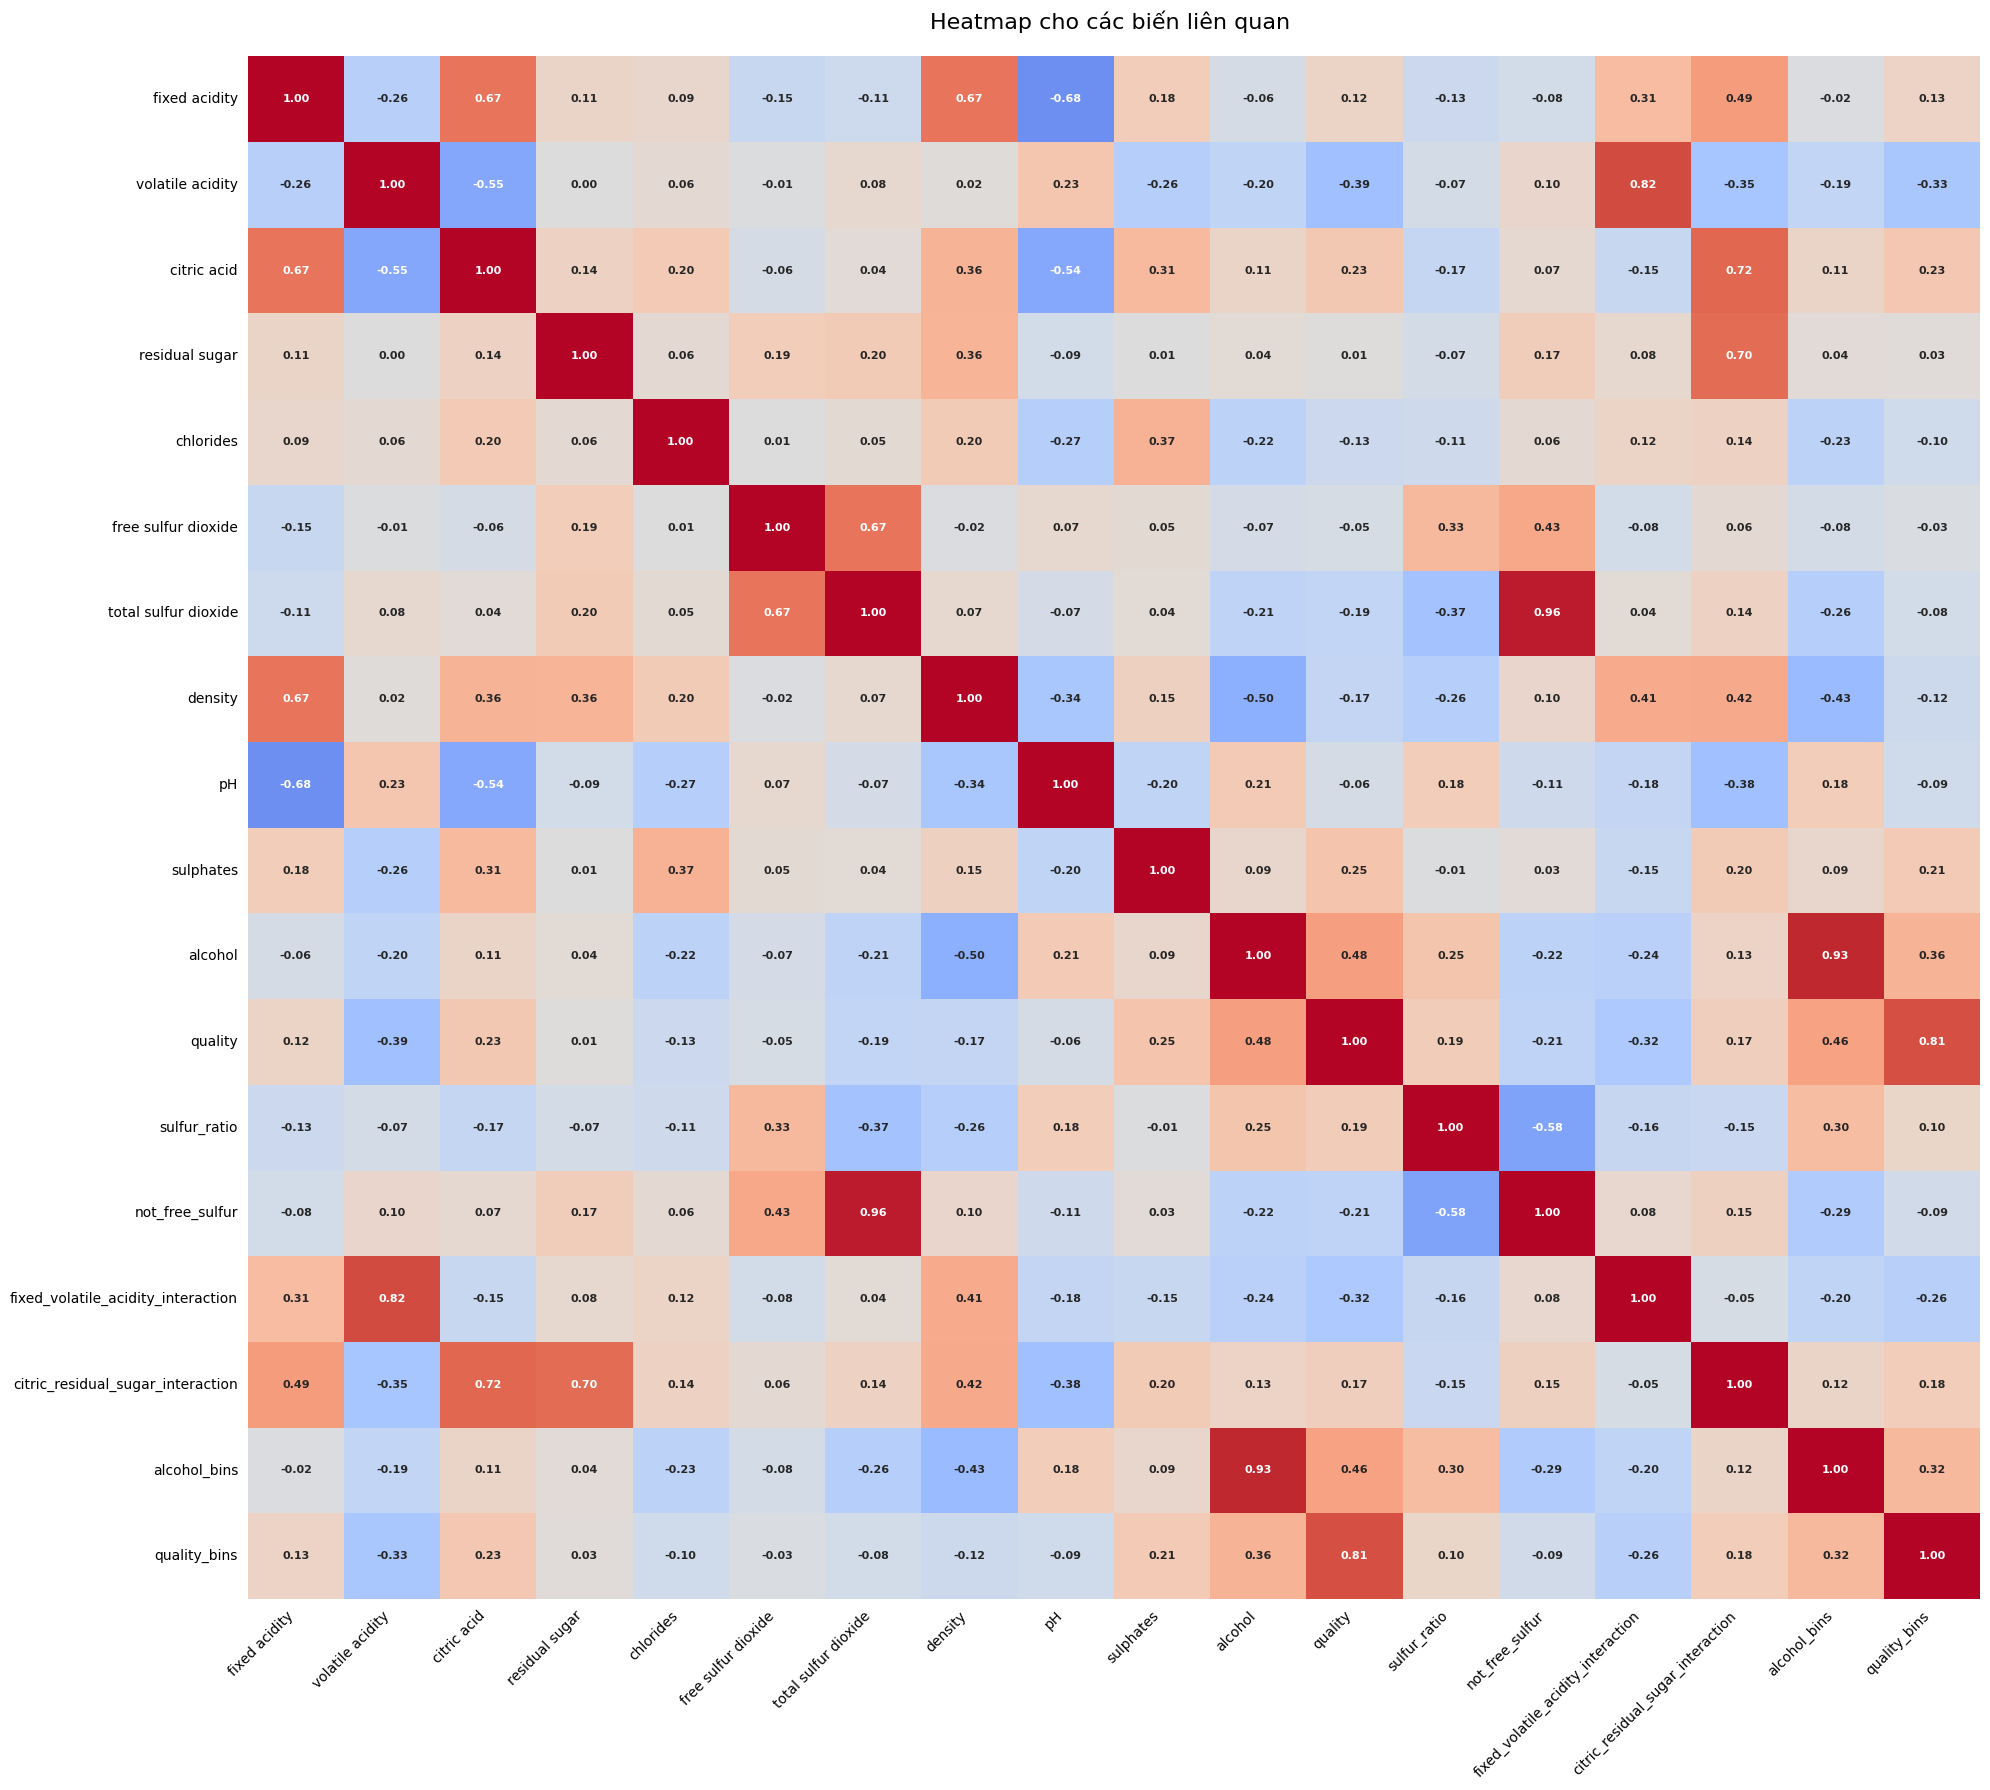

In [16]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(20, 18))  # Reduced figure size for better fit
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f',
            cmap='coolwarm', annot_kws={'fontsize': 8, 'fontweight': 'bold'}, cbar=False)

ax.tick_params(left=False, bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

plt.title('Heatmap cho các biến liên quan ', fontsize=16, pad=20)
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()

Loại những cặp có correlation cao 

In [17]:
# viết function để tự độngđộng hóa
def correlation(corr, threshold):
    corr_pair = [] # Set of all the names of correlated columns
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold : 
                corr_pair.append((corr.columns[i], corr.columns[j], corr.iloc[i,j]))
    return corr_pair

In [18]:
correlated_features = correlation(corr, 0.7) # các features cần bị loại bỏ

In [19]:
drop_features = []
for i ,j, k in correlated_features:
    drop_features.append(j)
drop_features = list(set(drop_features))
drop_features

['residual sugar',
 'alcohol',
 'citric acid',
 'total sulfur dioxide',
 'quality',
 'volatile acidity']

In [20]:
df_features = df.drop(['volatile acidity',
 'total sulfur dioxide',
 'alcohol',
 'quality',
 'citric acid',
 'residual sugar'], axis=1)
df_features

,fixed acidity,chlorides,free sulfur dioxide,density,pH,sulphates,sulfur_ratio,not_free_sulfur,fixed_volatile_acidity_interaction,citric_residual_sugar_interaction,alcohol_bins,quality_bins
0,7.4,0.076,11.0,0.99780,3.51,0.56,0.323529,23.0,5.1800,0.000,0,1
1,7.8,0.098,25.0,0.99680,3.20,0.68,0.373134,42.0,6.8640,0.000,1,1
2,7.8,0.092,15.0,0.99700,3.26,0.65,0.277778,39.0,5.9280,0.092,1,1
3,11.2,0.075,17.0,0.99800,3.16,0.58,0.283333,43.0,3.1360,1.064,1,1
4,7.4,0.076,11.0,0.99780,3.51,0.56,0.323529,23.0,5.1800,0.000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.090,32.0,0.99490,3.45,0.58,0.727273,12.0,3.7200,0.160,2,1
1595,5.9,0.062,39.0,0.99512,3.52,0.76,0.764706,12.0,3.2450,0.220,3,1
1596,6.3,0.076,29.0,0.99574,3.42,0.75,0.725000,11.0,3.2130,0.299,3,1
1597,5.9,0.075,32.0,0.99547,3.57,0.71,0.727273,12.0,3.8055,0.240,2,1


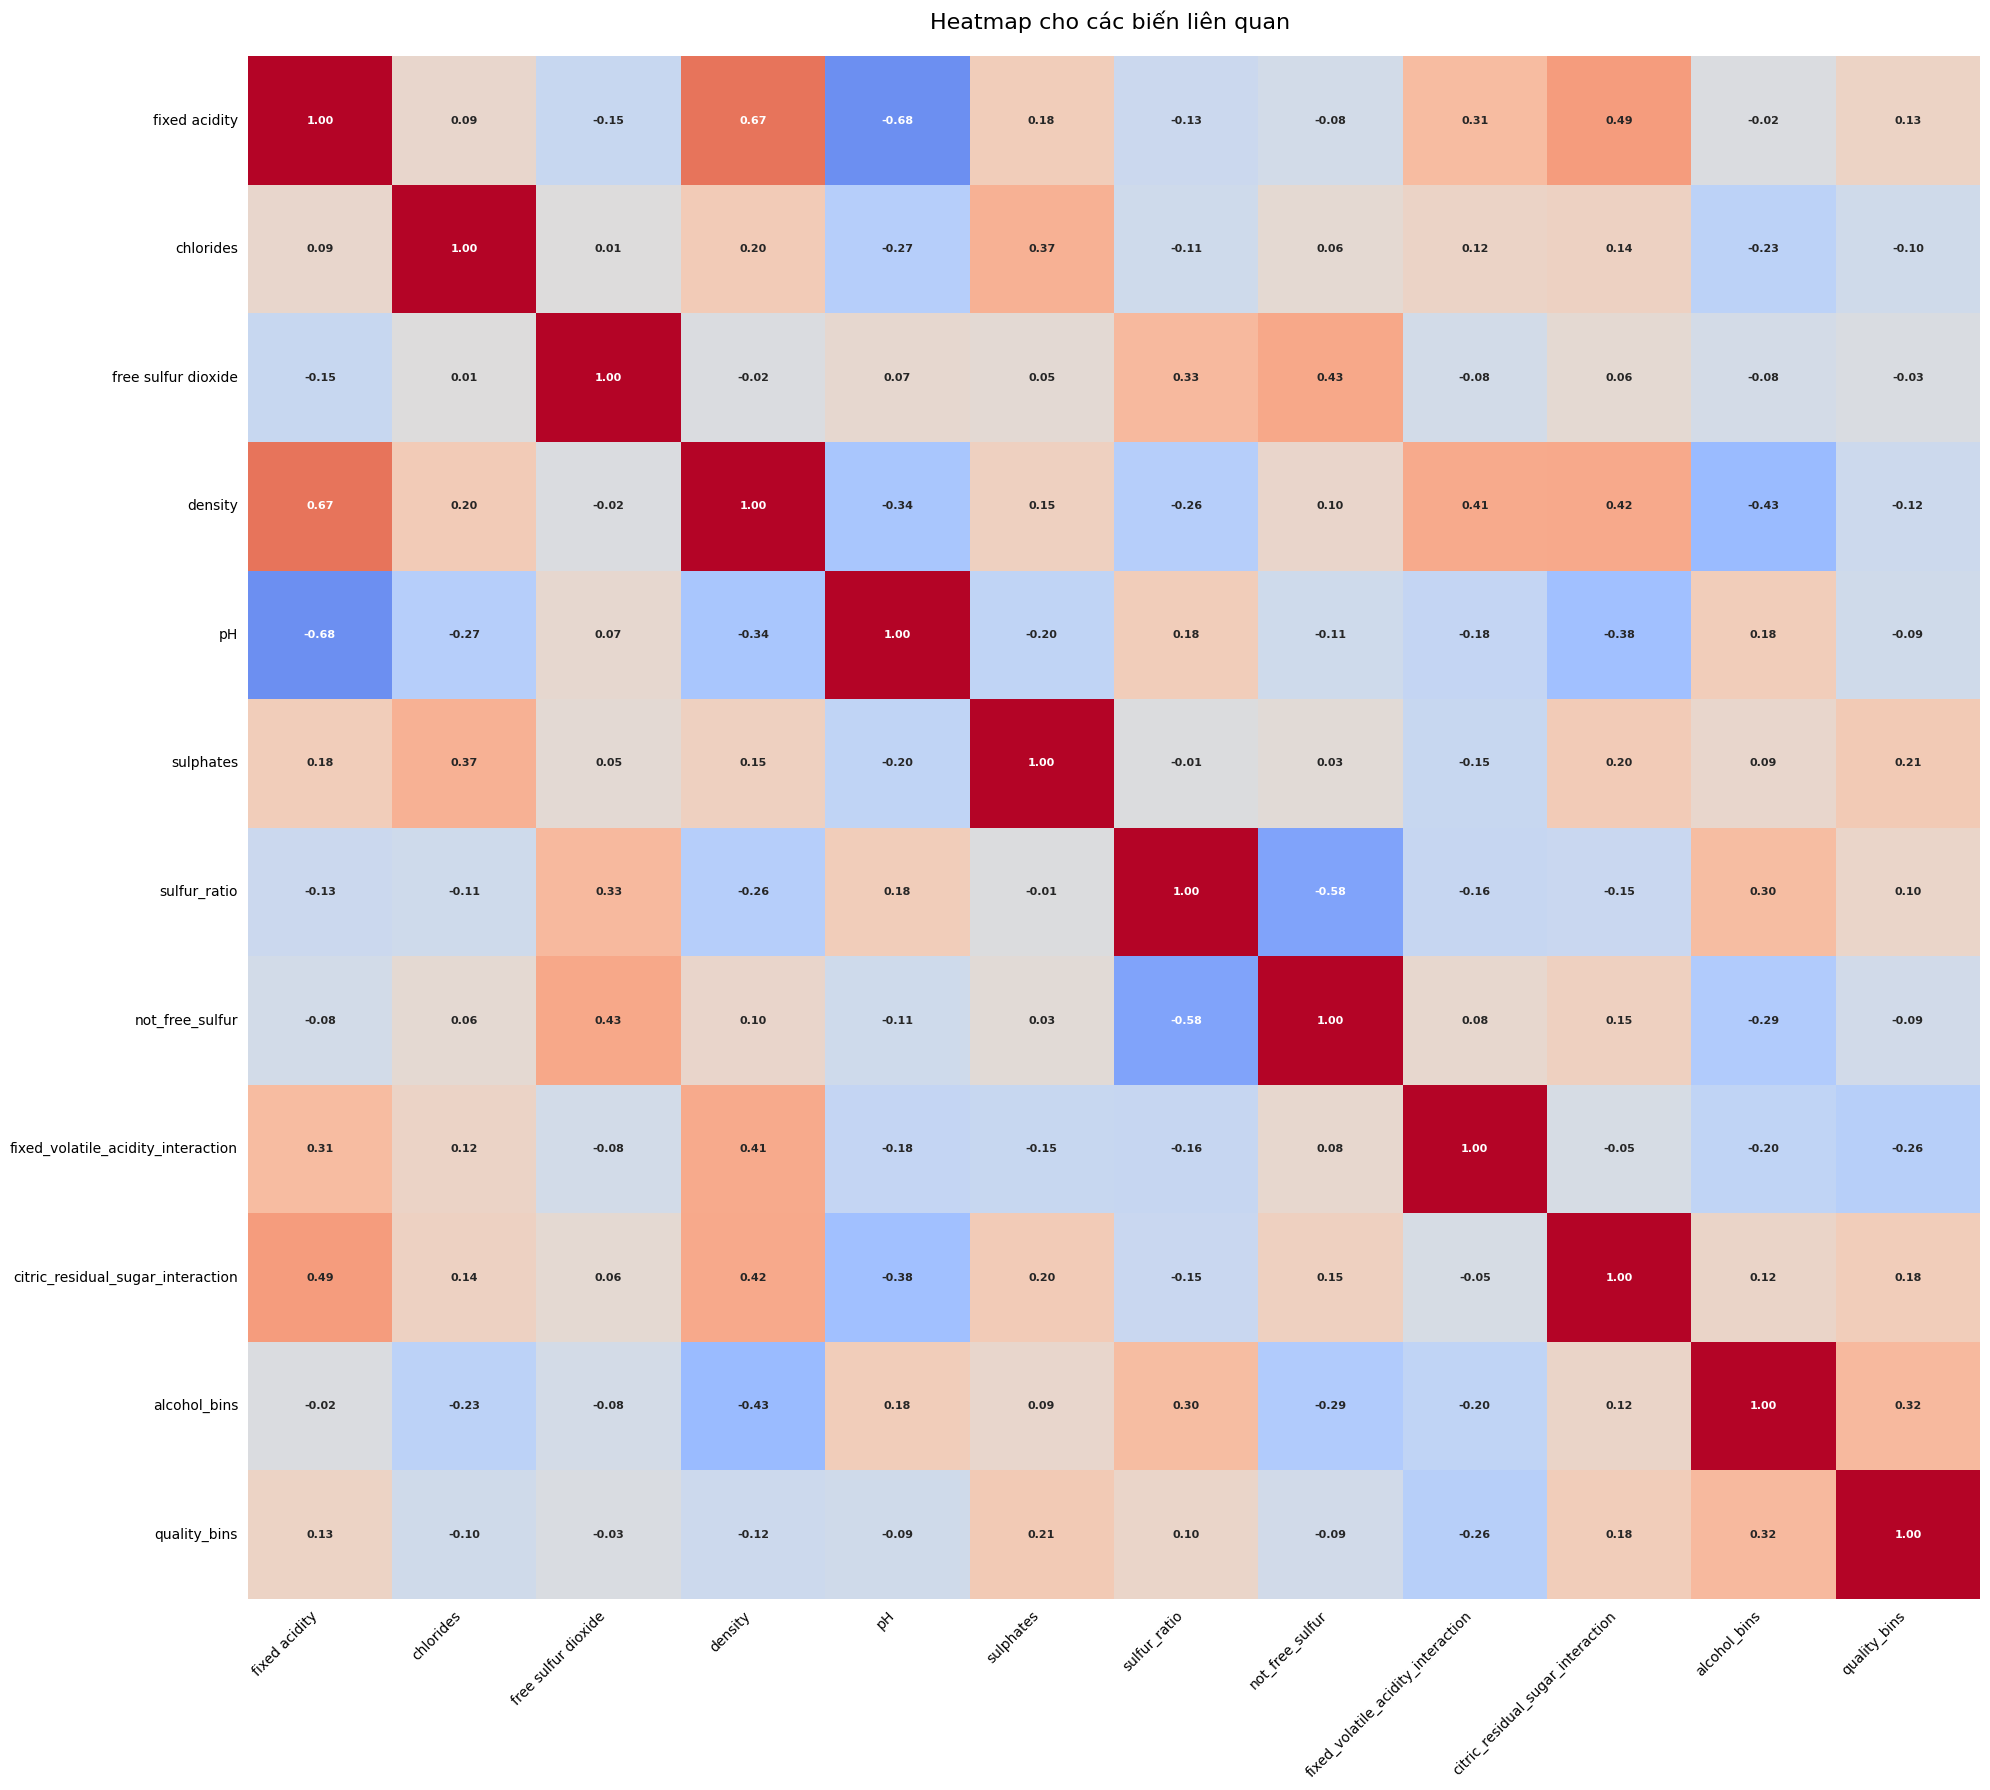

In [21]:
corr = df_features.corr()

fig, ax = plt.subplots(figsize=(20, 18))  # Reduced figure size for better fit
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f',
            cmap='coolwarm', annot_kws={'fontsize': 8, 'fontweight': 'bold'}, cbar=False)

ax.tick_params(left=False, bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

plt.title('Heatmap cho các biến liên quan ', fontsize=16, pad=20)
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()

==> Ta xử lý xong dataset


## **5. Chia dữ liệu:**



In [23]:
X, y = df_features.drop(['quality_bins'], axis=1), df_features['quality_bins']
y.value_counts(normalize = True)

quality_bins
1    0.824891
2    0.135710
0    0.039400
Name: proportion, dtype: float64

In [24]:
# Apply SMOTE
smote = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

=> Tập y có sự mất cần bằng khá lớn, ta dùng kỹ thuật SMOTE để xủ lý

In [25]:
scaler = RobustScaler()# để giảm ảnh hưởng của outlier

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify = y_resampled , random_state=42)

=> Tập y đã có sự cân bằng giữa các giá trị

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **6. Xây dựng mô hình cơ bản:**


In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [30]:
y_pred = dt.predict(X_test)

In [31]:
accuracy = dt.score(X_test, y_test)
print(f"Accuracy   {accuracy}")
print(f"Classification Report ")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Accuracy   0.8942675159235669
Classification Report 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       261
           1       0.87      0.86      0.86       261
           2       0.90      0.89      0.89       263

    accuracy                           0.89       785
   macro avg       0.89      0.89      0.89       785
weighted avg       0.89      0.89      0.89       785

[[244   8   9]
 [ 19 224  18]
 [  4  25 234]]


Hiệu suất theo từng lớp:

Lớp 3.0: Hiệu suất rất tốt với precision 0.92, recall 0.97 và F1-score 0.95. Mô hình có khả năng nhận diện và phân loại lớp này rất tốt.

Lớp 4.0: Hiệu suất khá tốt với precision 0.91, recall 0.89 và F1-score 0.90.

Lớp 5.0: Hiệu suất trung bình với precision 0.74, recall 0.72 và F1-score 0.73. Có thể cần cải thiện, đặc biệt là recall.

Lớp 6.0: Hiệu suất thấp nhất trong các lớp, với precision 0.61, recall 0.61 và F1-score 0.61. Đây là lớp cần được cải thiện nhiều nhất.

Lớp 7.0: Hiệu suất khá tốt với precision 0.79, recall 0.77 và F1-score 0.78.

Lớp 8.0: Hiệu suất rất tốt, gần như ngang bằng với lớp 3.0, có precision 0.94, recall 0.95 và F1-score 0.95.

=> Ta cần ưu tiên hơn vể sự cân bằng giữa precision và recall

## => Ta sẽ áp dụng kỹ thuật Decision Tree Pruning và sử dụng RandomSearchCV để so sánh và tìm ra mô hình tốt nhất trong 2 cách tối ưu model này"""

## **7. Kỹ thuật Pruning**

In [32]:
dt_test = DecisionTreeClassifier(random_state=42) # tạo 1 model để test

In [33]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
dt_collection = []
for ccp_alpha in ccp_alphas:
    dt_test = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dt_test.fit(X_train, y_train)
    dt_collection.append(dt_test)

In [34]:
test_scores = [dt_test.score(X_test, y_test) for dt_test in dt_collection]

In [35]:
optimal_alpha = ccp_alphas[test_scores.index(max(test_scores))]
print(f"Optimal alpha: {optimal_alpha}")

Optimal alpha: 0.0002941609060155904


In [36]:
pruned_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
pruned_dt.fit(X_train, y_train)
print(f"Điểm trước khi cắt tỉa:{dt.score(X_test,y_test):.4f}")
print(f"Điểm sau khi đã cắt tỉa: {pruned_dt.score(X_test, y_test):.4f}")
pruned_pred = pruned_dt.predict(X_test)

Điểm trước khi cắt tỉa:0.8943
Điểm sau khi đã cắt tỉa: 0.8955


In [37]:
accuracy = pruned_dt.score(X_test, y_test)
print(f"Accuracy   {accuracy}")
print(f"Classification Report ")
print(classification_report(y_test, pruned_pred))

conf_matrix = confusion_matrix(y_test, pruned_pred)
print(conf_matrix)

Accuracy   0.8955414012738854
Classification Report 
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       261
           1       0.87      0.86      0.87       261
           2       0.90      0.89      0.89       263

    accuracy                           0.90       785
   macro avg       0.90      0.90      0.90       785
weighted avg       0.90      0.90      0.90       785

[[244   8   9]
 [ 18 225  18]
 [  4  25 234]]


Sau khi áp dụng pruning, có một số cải thiện nhỏ trong hiệu suất của mô hình:

Độ chính xác tổng thể tăng nhẹ (lên 0.5%).

Hầu hết các lớp đều có sự cải thiện nhỏ trong ít nhất một chỉ số (precision, recall, hoặc F1-score).

Lớp 5.0 và 7.0 có sự cải thiện rõ rệt nhất. 

-- lớp 5.0:

Trước: 0.74 / 0.72 / 0.73

Sau:  0.75 / 0.75 / 0.75

Cải thiện nhẹ ở cả ba chỉ số.

-- lớp 7.0:
Trước: 0.79 / 0.77 / 0.78

Sau:  0.82 / 0.77 / 0.80

Cải thiện precision và F1-score, recall không đổi.

Lớp 6.0 không thay đổi, cho thấy pruning không ảnh hưởng đến việc phân loại lớp này.

## **8. Điều chỉnh siêu tham số: FINE TUNNING VỚI RandomSearchCV**


In [49]:
params = {
    'max_depth': range(2,20,1),
    'min_samples_leaf': range(1,15,1),
    'min_samples_split': range(2,15,1),
    'criterion': ["gini", "entropy"],
    'splitter':['best','random']
}

In [51]:
random_search = RandomizedSearchCV(
    estimator=pruned_dt,
    param_distributions=params,
    n_iter=100,
    scoring= 'accuracy',  
    cv=6,
    random_state=42,
    n_jobs=-1
    )


random_search.fit(X_train, y_train)
pred = random_search.predict(X_test)
best_model = random_search.best_estimator_
best_params_random = random_search.best_params_
print(f"Best Parameters (Random Search): {best_params_random}")
print(f"Best Model  (Random Search): {best_model}")


Best Parameters (Random Search): {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'entropy'}
Best Model  (Random Search): DecisionTreeClassifier(ccp_alpha=0.0002941609060155904, criterion='entropy',
                       max_depth=15, random_state=42)


=> Vậy model tối ưu của ta sẽ có những tham số, criterion='entropy', max_depth=15, min_samples_leaf=1,random_state=42

tuy nhiên, để có được sự cân bằng giữa precision và recall , ta nên dùng criterion 'gini', và min_samples_leaf= 1

## **9. Model tối ưu**

In [56]:
dt_best =  DecisionTreeClassifier(ccp_alpha=0.0002941609060155904, criterion='gini',
                       max_depth=15, min_samples_leaf=1, min_samples_split=2,
                       random_state=42)


In [57]:

dt_best.fit(X_train, y_train)
predict = dt_best.predict(X_test)

In [58]:
accuracy = dt_best.score(X_test, y_test)
print(f"Accuracy for the best tree model  {accuracy}")
print(f"Classification Report ")
print(classification_report(y_test, predict))

conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)

Accuracy for the best tree model  0.9057324840764331
Classification Report 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       261
           1       0.90      0.85      0.88       261
           2       0.91      0.91      0.91       263

    accuracy                           0.91       785
   macro avg       0.91      0.91      0.91       785
weighted avg       0.91      0.91      0.91       785

[[249   7   5]
 [ 19 223  19]
 [  6  18 239]]


==> Ta có mô hình tối ưu nhất

Độ chính xác tổng thể (accuracy):

Mô hình cây quyết định tốt nhất này có độ chính xác khoảng 0.839 (83.9%), cao hơn so với mô hình trước đó (0.824). Đây là một cải thiện đáng kể.


Hiệu suất theo từng lớp:

Lớp 3.0: Hiệu suất rất tốt với precision 0.94, recall 0.97 và F1-score  0.96. Gần như không thay đổi so với mô hình trước.

Lớp 4.0: Cải thiện đáng kể với precision 0.90, recall 0.91 và F1-score 0.90 (so với   0.91,  0.89 và  0.90 trước đó).

Lớp 5.0: Cải thiện tốt với precision 0.76, recall 0.76 và F1-score 0.76 (so với 0.74, 0.72,0.73 trước đó).

Lớp 6.0: Vẫn là lớp có hiệu suất thấp nhất, nhưng đã cải thiện với precision 0.66, recall 0.63 và F1-score 0.64 (so với 0.61, 0.61, 0.61 trước đó).

Lớp 7.0: Cải thiện nhẹ với precision 0.81, recall 0.77 và F1-score 0.79 (so với 0.79, 0.77, 0.78trước đó).

Lớp 8.0: Hiệu suất tuyệt vời và cải thiện nhẹ với precision 0.93, recall 0.96 và F1-score 0.94 (so với 0.94, 0.95, 0.95 trước đó).

## **10.Những features đặc trưng nhất**

                               feature  importance
10                        alcohol_bins    0.271040
5                            sulphates    0.213063
8   fixed_volatile_acidity_interaction    0.103753
7                      not_free_sulfur    0.087057
4                                   pH    0.077585
6                         sulfur_ratio    0.057768
0                        fixed acidity    0.050674
3                              density    0.045936
1                            chlorides    0.036980
9    citric_residual_sugar_interaction    0.032865
2                  free sulfur dioxide    0.023278


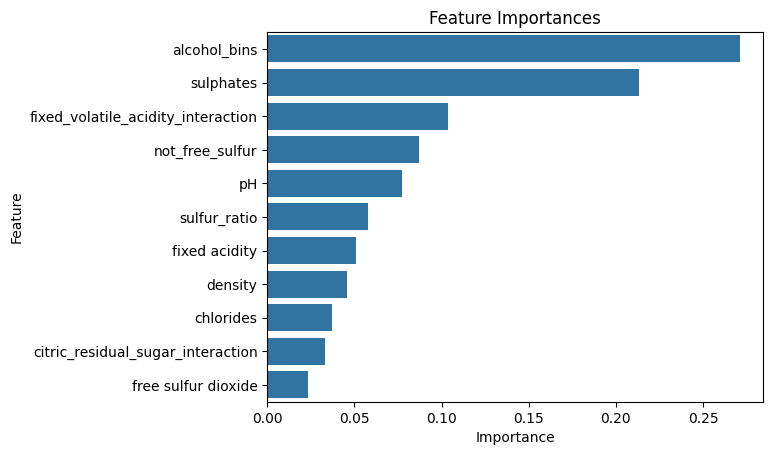

In [59]:
# Get feature importances
importances = dt_best.feature_importances_

# Create a DataFrame   
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print feature importances
print(feature_importances) 


# Visualize feature importances using a bar plot
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [60]:
selected_features = feature_importances[feature_importances['importance'] > 0.05]['feature'].tolist()

In [61]:
print("Những features quan trọng nhất", selected_features)

Những features quan trọng nhất ['alcohol_bins', 'sulphates', 'fixed_volatile_acidity_interaction', 'not_free_sulfur', 'pH', 'sulfur_ratio', 'fixed acidity']


## **11. Màn hình chức năng**

In [62]:
import joblib as jb
jb.dump(dt_best, 'wine_quality_model.pkl')
jb.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [63]:
df_features.to_csv("df_features.csv")

## => Ta tạo ra 1 bản copy của file dataset đã được xử lý để so sánh kết quả mô hình

In [64]:
user_interface = df_features.copy()
user_interface.head()

,fixed acidity,chlorides,free sulfur dioxide,density,pH,sulphates,sulfur_ratio,not_free_sulfur,fixed_volatile_acidity_interaction,citric_residual_sugar_interaction,alcohol_bins,quality_bins
0,7.4,0.076,11.0,0.9978,3.51,0.56,0.323529,23.0,5.180,0.000,0,1
1,7.8,0.098,25.0,0.9968,3.20,0.68,0.373134,42.0,6.864,0.000,1,1
2,7.8,0.092,15.0,0.9970,3.26,0.65,0.277778,39.0,5.928,0.092,1,1
3,11.2,0.075,17.0,0.9980,3.16,0.58,0.283333,43.0,3.136,1.064,1,1
4,7.4,0.076,11.0,0.9978,3.51,0.56,0.323529,23.0,5.180,0.000,0,1
